### <center>Rafli Fachrin Kardianyah</center>
#### <center>F1D022154</center>

In [164]:
import cv2
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Script diatas merupakan baris kode python yang mengimpor tiga library berbeda yaitu: cv2 merupakan library untuk pemrosesan gambar dan video, yang biasanya digunakan untuk membaca, menulis, dan memanipulasi citra. Numpy merupakan library untuk komputasi numerik dalam Python, digunakan untuk mengolah data array dan matriks dengan cepat dan efisien. Matplotlib.pyplot merupakan library untuk visualisasi data dalam bentuk grafik seperti histogram, dan diagram lainnya, import matplotlib.image library untuk membaca gambar.

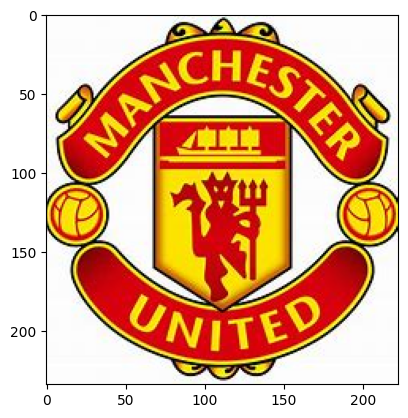

In [165]:
manchester = mpimg.imread("manchester_united.jpeg")
plt.imshow(manchester)
plt.show()

Fungsi mpimg.imread() pada library Matplotlib digunakan untuk membaca sebuah file citra. Dalam kode tersebut, file citra dengan nama "manchester_united.jpeg" dibaca dan diubah ke dalam bentuk array Numpy, yang kemudian disimpan ke dalam variabel img. Untuk 'plt.imshow(image)' akan menampilkan citrra dari marc.jpg

(234, 223)

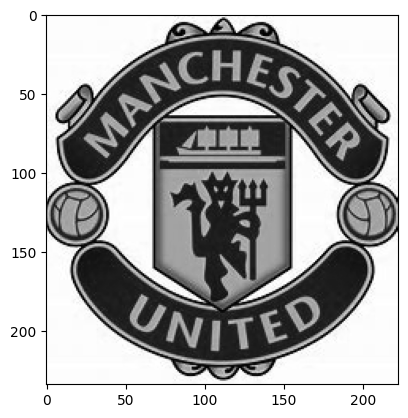

In [166]:
image = cv2.cvtColor(manchester, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap='gray')
gray.shape

script gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) berfungsi untuk mengonversi citra warna menjadi citra grayscale, dan menyimpannya dalam variabel gray.
Setelah itu, citra grayscale yang disimpan ke dalam variabel gray_marc ditampilkan menggunakan fungsi plt.imshow(). Pada paraneter 'cmap' diset ke nilai  'gray' ini menghasilkan citra yang akan ditampilkan menjadi skala abu-abu.
Untuk script gray.shape digunakan untuk mencetak dimensi citra grayscale.

# Mean

In [167]:
meankernel3x3 = np.array([[1, 1, 1],
                          [1, 1, 1],
                          [1, 1, 1]])/9

Blok kode di atas digunakan untuk menginisalisasi kernel untuk mean filtering dengan ukuran window 3x3 pixel, dimana total penjumlahan pixel yang masuk ke window nanti akan dibagi sesuai dengan jumlah data yaitu 3 x 3 = 9.

In [168]:
meankernel9x9 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1],
                          [1, 1, 1, 1, 1, 1, 1, 1, 1]])/81

Blok kode di atas digunakan untuk menginisalisasi kernel untuk mean filtering dengan ukuran window 9x9 pixel, dimana total penjumlahan pixel yang masuk ke window nanti akan dibagi sesuai dengan jumlah data yaitu 9 x 9 = 81.

In [169]:
def mean(img, size1, win1):
    height , width = img.shape
    hasil = np.zeros(img.shape)
    size2, win2 = int ((size1-1)/2), int ((win1-1)/2)
    padd = np.pad (image, ((size2,size1-size2-1),(win2,win1-win2-1)) , "edge" )
    for i in range (height):
        for j in range (width):
            hasil[i,j] = np.mean(padd[i:i+size1, j:j+win1])
    return hasil

Blok kode di atas merupakan fungsi mean, yaitu fungsi yang akan digunakan untuk mencari mean atau nilai rata-rata dari pixel yang berada di dalam sliding window. Fungsi ini menggunakan 4 buah parameter, yaitu citra yang akan diproses, jumlah baris kernel, jumlah kolom kernel, dan window (kernel). Hal pertama yang dilakukan adalah memberikan padding dengan mode = "edge" yaitu pada matriks citra asal dengan ukuran yang sesuai dengan kernel yang diinginkan. Lalu membuat array kosong yang akan digunakan untuk menyimpan hasil perhitungan mean filtering dengan nama result. Kemudian melakukan perulangan untuk melakukan perhitungan mean dengan memindahkan sliding window dari indeks ke indeks sesuai kondisi pada for, menghituung nilai rata-rata dari pixel yang berada dalam window, dan menyimpan hasil perpixelnya ke dalam variabel result.

# Modus

In [170]:
def modus(matriks):
   subarray = matriks.flatten()
   for x in range(len(matriks)):
      for y in range(0, len(subarray)-x-1): 
         if subarray[y] > subarray[y+1]:
            subarray[y], subarray[y+1] = subarray[y+1], subarray[y]

   indeks = np.zeros (np.max(subarray) + 1, dtype= int )
   for i in range (len(subarray)):
      indeks[subarray[i]] += 1    
   cek = np.max(indeks)
   for j in range (len(indeks)):
      if (indeks[j] == cek):
         return j
        
def modusfiltering(image, rowkernel, columnkernel):
   result = np.zeros(image.shape)
   row, column = int((rowkernel-1)/2), int((columnkernel-1)/2)
   image_pad = np.pad (image, ((row, rowkernel-row-1), (column, columnkernel-column-1)), "edge" )
   for i in range (image.shape[0]):
      for j in range (image.shape[1]):
         result[i, j] = modus(image_pad[i:i+rowkernel, j:j+columnkernel])
   return result

Blok kode di atas merupakan fungsi modus, yaitu fungsi yang akan digunakan untuk mencari modus dari pixel yang berada di dalam sliding window dengan menjadikan matriks parameter sebagai array 1 dimensi dan mengurutkan array tersebut. Fungsi ini hanya menggunakan sebuah parameter, yaitu matriks yang akan diproses.

Blok kode di atas merupakan fungsi modusfiltering, yaitu fungsi yang akan digunakan untuk mencari modus dengan memanggil fungsi modus di atasnya. Fungsi ini menggunakan 3 buah parameter, yaitu citra yang akan diproses, jumlah baris kernel, dan jumlah kolom kernel. Hal pertama yang dilakukan adalah memberikan padding dengan mode = "edge" yaitu pada matriks citra asal dengan ukuran yang sesuai dengan kernel yang diinginkan. Lalu membuat array kosong yang akan digunakan untuk menyimpan hasil perhitungan median filtering dengan nama result. Kemudian melakukan perulangan dan memanggil fungsi modus lalu menyimpan hasil perpixelnya ke dalam variabel result.

# Median

In [171]:
def Median (image, rowkernel, columnkernel):
    row = int((rowkernel-1)/2)
    column = int((columnkernel-1)/2)
    image_pad = np.pad(image, [row,column], mode="edge")
    result = np.zeros(image.shape)
    
    for i in range  (row, image.shape[0] - row):
        for j in range (column, image.shape[1] - column):
            submatrix = image_pad[i-row:i+row+1, j-column:j+column+1]
            
            subarray = submatrix.flatten() 
            for x in range(len(subarray)):
                for y in range(0, len(subarray)-x-1):
                    if subarray[y] > subarray[y+1]:
                       subarray[y], subarray[y+1] = subarray[y+1], subarray[y]
            
            median = subarray[(len(subarray))//2]
            result[i-row, j-column] = median
           
    return result

Blok kode di atas merupakan fungsi median, yaitu fungsi yang akan digunakan untuk mencari median atau nilai tengah dari pixel yang berada di dalam sliding window. Fungsi ini menggunakan 3 buah parameter, yaitu citra yang akan diproses, jumlah baris kernel, dan jumlah kolom kernel. Hal pertama yang dilakukan adalah memberikan padding dengan mode = "edge" yaitu pada matriks citra asal dengan ukuran yang sesuai dengan kernel yang diinginkan. Lalu membuat array kosong yang akan digunakan untuk menyimpan hasil perhitungan median filtering dengan nama result. Kemudian melakukan perulangan untuk mengurutkan pixel dan memindahkan sliding window dari indeks ke indeks sesuai kondisi pada for, lalu menghitung nilai tengah dari pixel-pixel yang berada dalam window, dan menyimpan hasil perpixelnya ke dalam variabel result.

In [184]:

sharp = np.array([[1/10, 1/10, 1/10],
                    [1/10, 1/5, 1/10],
                    [1/10, 1/10, 1/10]])
    
smooth = np.array([[1/9, 1/9, 1/9],
                    [1/9, 8/9, 1/9],
                    [1/9, 1/9, 1/9]])

Kode diatas mendefinisikan dua matriks, `sharp` dan `smooth`, yang digunakan dalam pemrosesan gambar menggunakan teknik filter. Matriks `sharp` dimaksudkan untuk meningkatkan ketajaman gambar, sementara `smooth` digunakan untuk meratakan atau menyamakan intensitas piksel-piksel dalam gambar. Matriks `sharp` terdiri dari nilai bobot yang dipusatkan pada piksel utama dengan bobot tertinggi di tengah matriks, sehingga piksel di sekitar pusat memberikan kontribusi kecil terhadap hasil akhir, menciptakan efek penajaman pada gambar. Sementara itu, matriks `smooth` memiliki nilai bobot yang merata di seluruh matriks, dengan bobot tertinggi berada di piksel utama, yang menghasilkan operasi smoothing pada gambar dengan meratakan intensitas piksel dan mengurangi noise. Kedua matriks ini merupakan contoh kernel yang digunakan dalam operasi konvolusi, teknik yang umum digunakan dalam pemrosesan gambar untuk berbagai tujuan, termasuk peningkatan kualitas gambar dan deteksi fitur.

In [175]:
def konvolusi(image, kernel):
    result = np.zeros(image.shape).astype(int)
    pad = getPad(image, kernel)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            sum = 0
            for k in range(kernel.shape[0]):
                for l in range(kernel.shape[1]):
                    sum+= pad[i+k][j+l] * kernel[k,l]

            result[i,j] = sum

    return result

def getPad(image, kernel):
    i = (kernel.shape[1]-1)//2
    j = (kernel.shape[0]-1)//2

    kiri = i
    kanan = (kernel.shape[1]-1)-i
    atas = j
    bawah = (kernel.shape[0]-1)-j
    result = np.pad(image,((atas, bawah), (kiri,kanan)), 'edge')
    
    return result

Kode diatas adalah implementasi dari fungsi konvolusi untuk memproses gambar menggunakan kernel tertentu. Fungsi `konvolusi(image, kernel)` mengambil gambar dan kernel sebagai input, kemudian melakukan operasi konvolusi antara gambar dan kernel tersebut. Pertama-tama, fungsi menginisialisasi matriks `result` dengan ukuran yang sama dengan gambar input dan diisi dengan nol. Fungsi `getPad(image, kernel)` digunakan untuk menambahkan padding pada gambar input sesuai dengan ukuran kernel. 

Selanjutnya, dilakukan iterasi pada setiap piksel dalam gambar input. Pada setiap iterasi, nilai piksel baru dihitung dengan melakukan operasi konvolusi pada piksel tersebut dengan menggunakan nilai kernel yang sesuai. Operasi konvolusi dilakukan dengan mengalikan nilai piksel-piksel di sekitar piksel yang sedang diproses dengan bobot yang ditentukan oleh kernel, dan kemudian menjumlahkan hasilnya. Hasil perhitungan ini disimpan dalam matriks `result` pada koordinat yang sesuai dengan piksel yang sedang diproses.

Setelah proses konvolusi selesai dilakukan untuk setiap piksel dalam gambar, matriks `result` yang telah diisi dengan hasil konvolusi dikembalikan sebagai output dari fungsi konvolusi. Dengan demikian, fungsi konvolusi tersebut dapat digunakan untuk berbagai macam operasi pemrosesan gambar, seperti deteksi tepi, penajaman, atau perataan gambar, tergantung pada kernel yang digunakan sebagai parameter input.

In [176]:
mean1 = mean(image, 3, 3)
mean2 = mean(image, 9, 9)
modus1 = modusfiltering(image, 3, 3)
modus2 = modusfiltering(image, 9, 9)
median1 = Median(image, 3, 3)
median2 = Median(image, 9, 9)
smooth1 = konvolusi(image, smooth)
sharpen1 = konvolusi(image, sharp)

Kode di atas merupakan rangkaian pemanggilan fungsi untuk melakukan berbagai jenis pemrosesan gambar. Pertama, dilakukan operasi mean filtering dan modus filtering pada gambar input dengan menggunakan matriks kernel 3x3 dan 9x9. Operasi mean filtering dan modus filtering bertujuan untuk meratakan intensitas piksel dalam gambar dan menekankan nilai piksel yang paling sering muncul dalam suatu wilayah, masing-masing dengan kernel yang berbeda untuk menghasilkan efek yang berbeda pula.

Selanjutnya, dilakukan operasi median filtering pada gambar input dengan menggunakan kernel 3x3 dan 9x9. Median filtering adalah metode pemrosesan gambar yang digunakan untuk mengurangi noise dengan mengganti nilai piksel dengan nilai median dari himpunan nilai piksel di sekitarnya.

Kemudian, dilakukan operasi smoothing (perataan) dan sharpening (penajaman) pada gambar input dengan menggunakan kernel smooth dan sharp. Kernel `smooth` merupakan matriks dengan bobot yang meratakan intensitas piksel, sementara kernel `sharp` bertujuan untuk meningkatkan ketajaman gambar dengan menekankan perbedaan intensitas piksel di sekitarnya.

Dengan melakukan serangkaian operasi ini, gambar input dapat dimodifikasi untuk berbagai tujuan seperti mengurangi noise, meratakan intensitas, meningkatkan ketajaman, dan menekankan fitur-fitur yang penting.

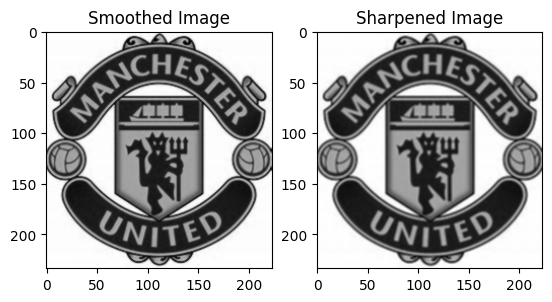

In [177]:
plt.subplot(1, 2, 1)
plt.imshow(smooth1, cmap='gray')
plt.title('Smoothed Image')

plt.subplot(1, 2, 2)
plt.imshow(sharpen1, cmap='gray')
plt.title('Sharpened Image')

plt.show()

code diatas merupakan code untuk menampilkan hasil dari sharpened dan juga smoothing

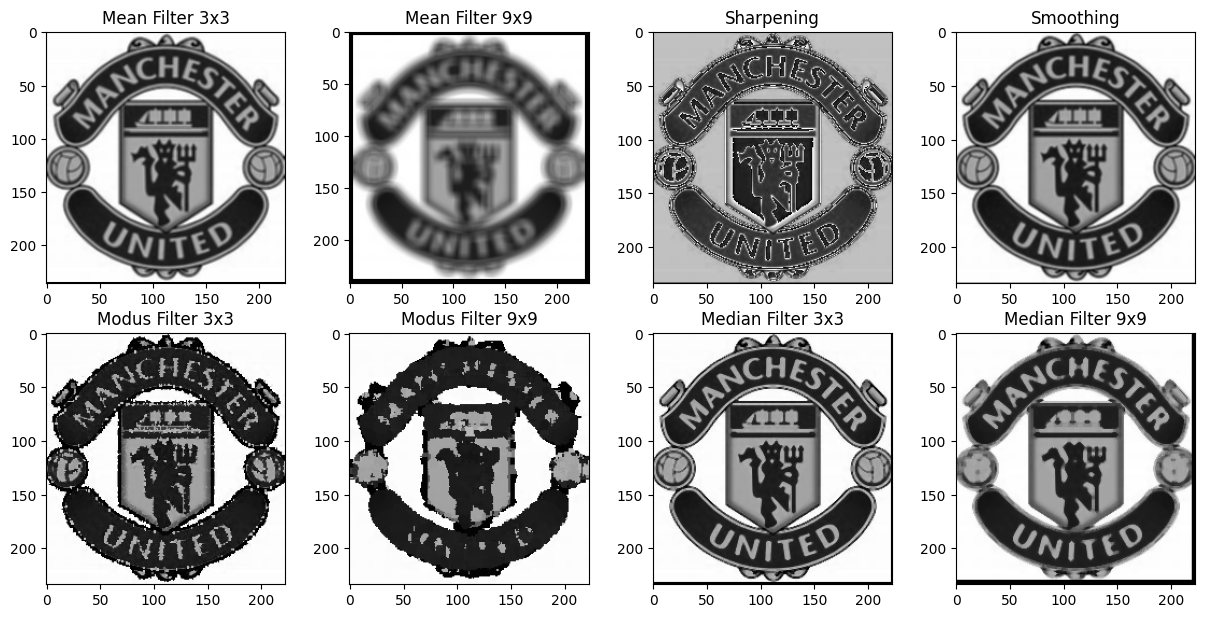

In [178]:
plt.figure(figsize = [15, 15])
plt.subplot(4,4,1); plt.title("Mean Filter 3x3"); plt.imshow(Mean(image, 3, 3, meankernel3x3), cmap = "gray")
plt.subplot(4,4,2); plt.title("Mean Filter 9x9"); plt.imshow(Mean(image, 9, 9, meankernel9x9), cmap = "gray")
plt.subplot(4,4,3); plt.title("Sharpening"); plt.imshow(sharpened_img, cmap='gray')
plt.subplot(4,4,4); plt.title("Smoothing"); plt.imshow(smoothed_img, cmap='gray')
plt.subplot(4,4,5); plt.title("Modus Filter 3x3"); plt.imshow(modusfiltering(image, 3, 3), cmap = "gray")
plt.subplot(4,4,6); plt.title("Modus Filter 9x9"); plt.imshow(modusfiltering(image, 9, 9), cmap = "gray")
plt.subplot(4,4,7); plt.title("Median Filter 3x3"); plt.imshow(Median(image, 3, 3), cmap = "gray")
plt.subplot(4,4,8); plt.title("Median Filter 9x9"); plt.imshow(Median(image, 5, 5), cmap = "gray")

Code tersebut merupakan bagian dari sebuah script untuk memvisualisasikan beberapa citra hasil dari proses filtrasi citra menggunakan beberapa filter yang telah didefinisikan sebelumnya. Pertama, sebuah figure dengan ukuran 15x15 inci dibuat menggunakan `plt.figure(figsize=[15, 15])`. Selanjutnya, menggunakan `plt.subplot(4, 4, n)`, sebuah grid subplot dengan ukuran 4 baris dan 4 kolom dibuat, dimana `n` merupakan urutan subplot dalam grid. Pada setiap subplot, judul diberikan menggunakan `plt.title()` untuk memberi informasi tentang jenis filter yang digunakan. Citra hasil dari proses filtrasi kemudian ditampilkan pada setiap subplot menggunakan `plt.imshow()`. Citra ditampilkan dalam skala abu-abu dengan parameter `cmap='gray'`. Keseluruhan subplot yang telah diatur ditampilkan menggunakan `plt.show()`. Dengan demikian, script ini menghasilkan satu figure yang memuat beberapa subplot yang menampilkan citra-citra hasil dari proses filtrasi dengan berbagai jenis filter yang telah didefinisikan sebelumnya.

In [179]:
sobel_x = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])

sobel_y = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])

prewitt_x = np.array([[-1, 0, 1],
                      [-1, 0, 1],
                      [-1, 0, 1]])

prewitt_y = np.array([[1, 1, 1],
                      [0, 0, 0],
                      [-1, -1, -1]])

robert_x = np.array([[1, 0],
                     [0, -1]])

robert_y = np.array([[0, 1],
                     [-1, 0]])

Kode diatas mendefinisikan matriks kernel untuk beberapa filter yang umum digunakan dalam pengolahan citra, yaitu filter Sobel, Prewitt, dan Robert. Filter Sobel digunakan untuk mendeteksi tepi dalam citra dengan menyoroti perubahan intensitas yang signifikan antara piksel-piksel di berbagai arah. Matriks kernel `sobel_x` dan `sobel_y` masing-masing merepresentasikan filter Sobel untuk deteksi tepi dalam arah horizontal dan vertikal. Matriks tersebut memiliki bobot yang menekankan perbedaan intensitas piksel di sekitar piksel yang sedang diproses dalam arah yang sesuai.

Filter Prewitt juga digunakan untuk mendeteksi tepi dalam citra dengan prinsip yang serupa dengan filter Sobel. Matriks kernel `prewitt_x` dan `prewitt_y` merepresentasikan filter Prewitt untuk deteksi tepi dalam arah horizontal dan vertikal. Filter ini serupa dengan filter Sobel tetapi memiliki distribusi bobot yang sedikit berbeda.

Filter Robert, yang diwakili oleh matriks kernel `robert_x` dan `robert_y`, juga digunakan untuk deteksi tepi dengan fokus pada arah diagonal. Filter ini berbeda dari filter Sobel dan Prewitt karena hanya menggunakan dua kernel, yang masing-masing digunakan untuk mendeteksi tepi dalam arah diagonal tertentu.

Dengan menggunakan matriks kernel ini dalam operasi konvolusi pada citra, kita dapat mengaplikasikan berbagai filter tepi untuk mengidentifikasi tepi dalam citra dengan arah yang berbeda-beda.

In [180]:
def sobel(image):
    edge_x = konvolusi(image, sobel_x)
    edge_y = konvolusi(image, sobel_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)
    edge_direction = np.arctan2(edge_y, edge_x)

    return edge_magnitude, edge_direction

def prewitt(image):
    edge_x = konvolusi(image, prewitt_x)
    edge_y = konvolusi(image, prewitt_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)
    edge_direction = np.arctan2(edge_y, edge_x)

    return edge_magnitude, edge_direction

def robert(image):
    edge_x = konvolusi(image, robert_x)
    edge_y = konvolusi(image, robert_y)

    edge_magnitude = np.sqrt(edge_x ** 2 + edge_y ** 2)
    edge_direction = np.arctan2(edge_y, edge_x)

    return edge_magnitude, edge_direction

Kode di atas mendefinisikan beberapa fungsi yang digunakan untuk menerapkan filter tepi pada gambar menggunakan filter Sobel, Prewitt, dan Robert. Setiap fungsi, yaitu `sobel(image)`, `prewitt(image)`, dan `robert(image)`, menerima gambar sebagai argumen input dan mengembalikan dua hasil: magnitudo tepi dan arah tepi.

Pertama, setiap fungsi memanggil fungsi `konvolusi(image, kernel)` dengan matriks kernel yang sesuai untuk filter yang diinginkan (sobel_x, sobel_y untuk Sobel, prewitt_x, prewitt_y untuk Prewitt, dan robert_x, robert_y untuk Robert). Fungsi `konvolusi()` diterapkan pada gambar input untuk mendapatkan tepi dalam arah horizontal dan vertikal.

Selanjutnya, magnitudo tepi dihitung menggunakan rumus Pythagoras untuk setiap piksel dari tepi horizontal dan vertikal. Arah tepi dihitung menggunakan fungsi arctan2 dari nilai tepi vertikal dan horizontal.

Hasil magnitudo tepi dan arah tepi kemudian dikembalikan sebagai keluaran dari masing-masing fungsi. Dengan menggunakan fungsi-fungsi ini, kita dapat dengan mudah menerapkan filter tepi Sobel, Prewitt, dan Robert pada gambar untuk mendapatkan informasi tentang lokasi dan orientasi tepi pada gambar tersebut.

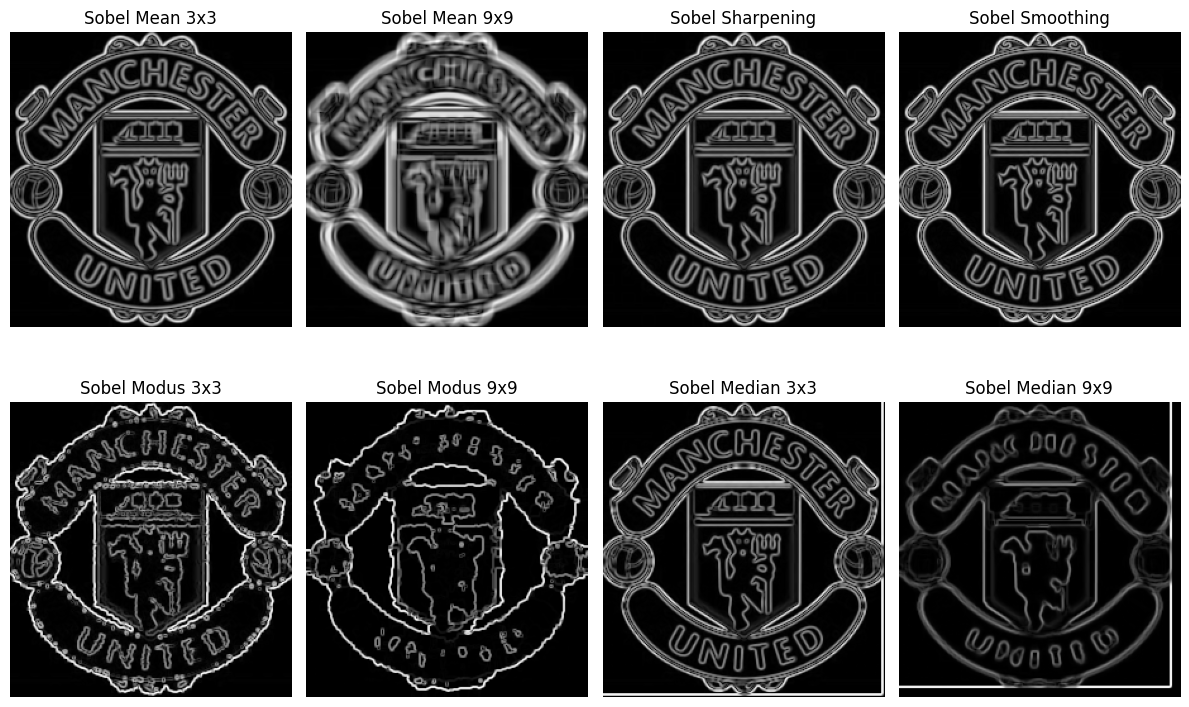

In [181]:
sobelmean_3x3, _ = sobel(mean1)
sobelmean_9x9, _ = sobel(mean2)
sobelsmoothing, _ = sobel(smooth1)
sobelsharpening, _ = sobel(sharpen1)
sobelmodus_3x3, _ = sobel(modus1)
sobelmodus_9x9, _ = sobel(modus2)
sobelmedian_3x3, _ = sobel(median1)
sobelmedian_9x9, _ = sobel(median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Sobel Mean 3x3')
plt.imshow(sobelmean_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title('Sobel Mean 9x9')
plt.imshow(sobelmean_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title('Sobel Sharpening')
plt.imshow(sobelsharpening, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title('Sobel Smoothing')
plt.imshow(sobelsmoothing, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title('Sobel Modus 3x3')
plt.imshow(sobelmodus_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title('Sobel Modus 9x9')
plt.imshow(sobelmodus_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title('Sobel Median 3x3')
plt.imshow(sobelmedian_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title('Sobel Median 9x9')
plt.imshow(sobelmedian_9x9, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

Kode tersebut melakukan proses filter tepi menggunakan filter Sobel pada berbagai jenis pemrosesan gambar yang telah dilakukan sebelumnya, seperti mean filtering, modus filtering, dan median filtering. Pertama, dilakukan pemanggilan fungsi `sobel()` untuk masing-masing jenis pemrosesan gambar dengan parameter yang sesuai, seperti `mean1`, `mean2`, `smooth1`, `sharpen1`, `modus1`, `modus2`, `median1`, dan `median2`.

Setelah hasil filter tepi diperoleh, kode tersebut menggunakan matplotlib untuk menampilkan hasilnya dalam bentuk gambar subplot. Dalam setiap subplot, gambar hasil filter tepi ditampilkan dengan judul yang sesuai, misalnya 'Sobel Mean 3x3', 'Sobel Mean 9x9', 'Sobel Sharpening', dan seterusnya. Kemudian, untuk menjaga tata letak yang baik, setiap subplot diberikan judul, gambar hasil filter tepi ditampilkan, dan sumbu x-y dihilangkan agar tidak mengganggu visualisasi. Hasil akhirnya adalah grid subplot yang menampilkan hasil dari berbagai jenis pemrosesan gambar yang berbeda dengan menerapkan filter Sobel pada masing-masingnya.

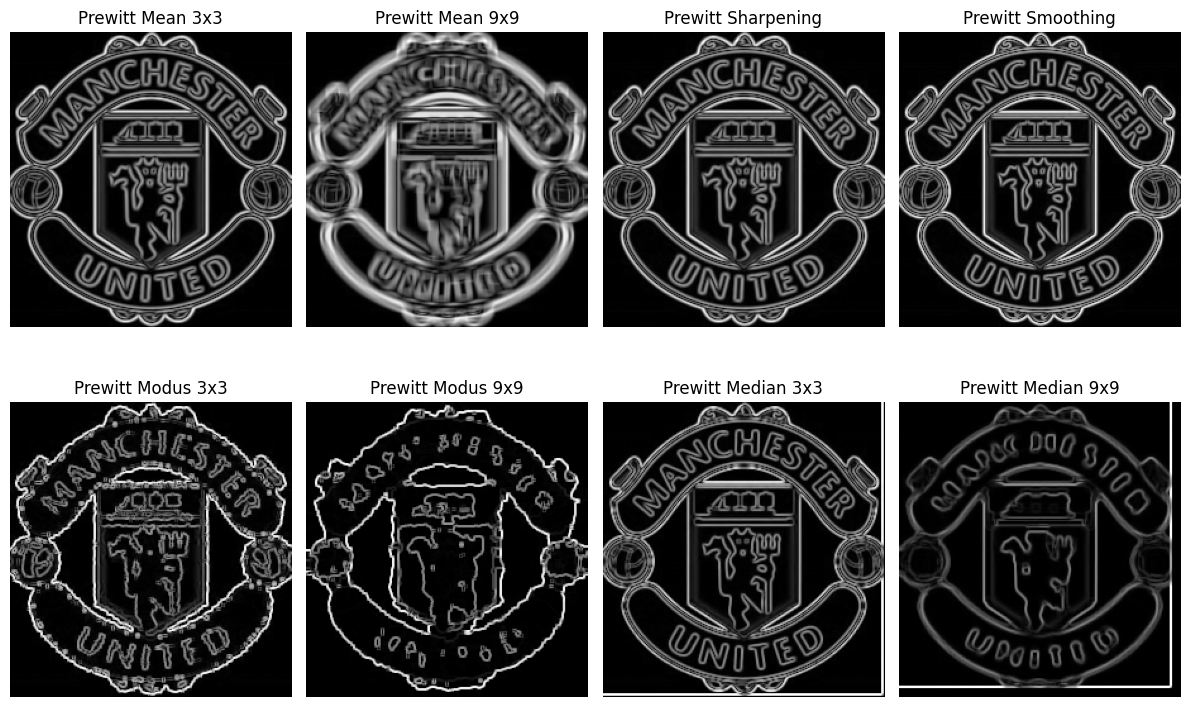

In [182]:
prewitt_mean_3x3, _ = prewitt(mean1)
prewitt_mean_9x9, _ = prewitt(mean2)
prewitt_smoothing, _ = prewitt(smooth1)
prewitt_sharpening, _ = prewitt(sharpen1)
prewitt_modus_3x3, _ = prewitt(modus1)
prewitt_modus_9x9, _ = prewitt(modus2)
prewitt_median_3x3, _ = prewitt(median1)
prewitt_median_9x9, _ = prewitt(median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Prewitt Mean 3x3')
plt.imshow(prewitt_mean_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title('Prewitt Mean 9x9')
plt.imshow(prewitt_mean_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title('Prewitt Sharpening')
plt.imshow(prewitt_sharpening, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title('Prewitt Smoothing')
plt.imshow(prewitt_smoothing, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title('Prewitt Modus 3x3')
plt.imshow(prewitt_modus_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title('Prewitt Modus 9x9')
plt.imshow(prewitt_modus_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title('Prewitt Median 3x3')
plt.imshow(prewitt_median_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title('Prewitt Median 9x9')
plt.imshow(prewitt_median_9x9, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

Kode ini melakukan proses filter tepi menggunakan filter Prewitt pada berbagai jenis pemrosesan gambar yang telah dilakukan sebelumnya, seperti mean filtering, modus filtering, dan median filtering. Pertama, dilakukan pemanggilan fungsi `prewitt()` untuk masing-masing jenis pemrosesan gambar dengan parameter yang sesuai, seperti `mean1`, `mean2`, `smooth1`, `sharpen1`, `modus1`, `modus2`, `median1`, dan `median2`.

Setelah hasil filter tepi diperoleh, kode tersebut menggunakan matplotlib untuk menampilkan hasilnya dalam bentuk gambar subplot. Dalam setiap subplot, gambar hasil filter tepi ditampilkan dengan judul yang sesuai, misalnya 'Prewitt Mean 3x3', 'Prewitt Mean 9x9', 'Prewitt Sharpening', dan seterusnya. Kemudian, untuk menjaga tata letak yang baik, setiap subplot diberikan judul, gambar hasil filter tepi ditampilkan, dan sumbu x-y dihilangkan agar tidak mengganggu visualisasi. Hasil akhirnya adalah grid subplot yang menampilkan hasil dari berbagai jenis pemrosesan gambar yang berbeda dengan menerapkan filter Prewitt pada masing-masingnya.

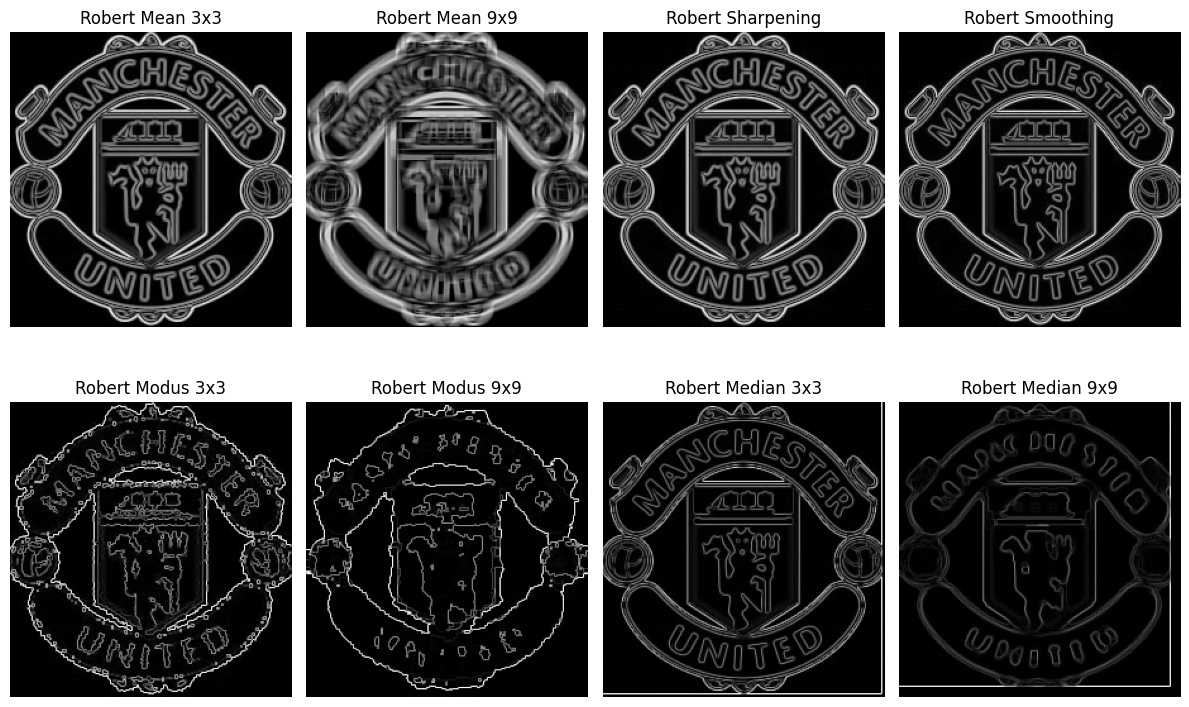

In [183]:
robert_mean_3x3, _ = robert(mean1)
robert_mean_9x9, _ = robert(mean2)
robert_smoothing, _ = robert(smooth1)
robert_sharpening, _ = robert(sharpen1)
robert_modus_3x3, _ = robert(modus1)
robert_modus_9x9, _ = robert(modus2)
robert_median_3x3, _ = robert(median1)
robert_median_9x9, _ = robert(median2)

plt.figure(figsize=(12, 8))

plt.subplot(2, 4, 1)
plt.title('Robert Mean 3x3')
plt.imshow(robert_mean_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 2)
plt.title('Robert Mean 9x9')
plt.imshow(robert_mean_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 3)
plt.title('Robert Sharpening')
plt.imshow(robert_sharpening, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 4)
plt.title('Robert Smoothing')
plt.imshow(robert_smoothing, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 5)
plt.title('Robert Modus 3x3')
plt.imshow(robert_modus_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 6)
plt.title('Robert Modus 9x9')
plt.imshow(robert_modus_9x9, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 7)
plt.title('Robert Median 3x3')
plt.imshow(robert_median_3x3, cmap="gray")
plt.axis("off")

plt.subplot(2, 4, 8)
plt.title('Robert Median 9x9')
plt.imshow(robert_median_9x9, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

Kode tersebut melakukan proses filter tepi menggunakan filter Robert pada berbagai jenis pemrosesan gambar yang telah dilakukan sebelumnya, seperti mean filtering, modus filtering, dan median filtering. Setiap pemanggilan fungsi `robert()` untuk masing-masing jenis pemrosesan gambar dilakukan dengan parameter yang sesuai, seperti `mean1`, `mean2`, `smooth1`, `sharpen1`, `modus1`, `modus2`, `median1`, dan `median2`.

Setelah hasil filter tepi diperoleh, kode tersebut menggunakan matplotlib untuk menampilkan hasilnya dalam bentuk gambar subplot. Dalam setiap subplot, gambar hasil filter tepi ditampilkan dengan judul yang sesuai, misalnya 'Robert Mean 3x3', 'Robert Mean 9x9', 'Robert Sharpening', dan seterusnya. Untuk menjaga tata letak yang baik, setiap subplot diberikan judul, gambar hasil filter tepi ditampilkan, dan sumbu x-y dihilangkan agar tidak mengganggu visualisasi. Hasil akhirnya adalah grid subplot yang menampilkan hasil dari berbagai jenis pemrosesan gambar yang berbeda dengan menerapkan filter Robert pada masing-masingnya.